**ScalerMart**

ScalerMart, a leading global electronics retailer, has experienced a significant downturn in sales, with a nearly 50% decline in revenue in 2020 compared to the previous year.

In response to this challenge, the company is actively seeking a sharp Data Analyst to join their growing team.

You have been assigned the task of analyzing the customer-level transactional data to identify potential reasons behind the decline in sales.

Your objective is to recommend data-driven strategies aimed at improving sales performance


In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [147]:
prod=pd.read_csv('Products.csv')


In [148]:
sales=pd.read_csv('Sales (3).csv')


In [149]:
cust=pd.read_csv('Customers (1).csv',encoding='latin-1')

**EDA**

In [150]:
prod.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [151]:
sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [152]:
cust.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


**Data Exploration and Cleaning:**

*Data Cleaning Steps:*



Data type validation:

In [153]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


* Unit Cost USD and Unit Price USD are integer columns but stored as object

In [154]:
def remove_dollar_and_convert_to_int(string):
  if string[0] == "$":
    string = string[1:]
  string = string.replace(",", "")
  return float(string)

In [155]:
prod['Unit Cost USD']=prod['Unit Cost USD'].apply(remove_dollar_and_convert_to_int)

In [156]:
prod['Unit Price USD']=prod['Unit Price USD'].apply(remove_dollar_and_convert_to_int)

In [157]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


In [158]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


* OrderDate and Delivery Date should be in datetime format

In [159]:
sales['Order Date']=pd.to_datetime(sales['Order Date'])

In [160]:
sales['Delivery Date']=pd.to_datetime(sales['Delivery Date'])

In [161]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  13165 non-null  datetime64[ns]
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 4.3+ MB


In [162]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


* Birthday should be datetime format

In [163]:
cust['Birthday']=pd.to_datetime(cust['Birthday'])

In [164]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State Code   15256 non-null  object        
 5   State        15266 non-null  object        
 6   Zip Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.2+ MB


* We have 2517 product types for 62884 sales order by 15266 customers

In [165]:
prod.describe().T

,count,mean,std,min,25%,50%,75%,max
ProductKey,2517.0,1259.000000,726.739637,1.00,630.00,1259.00,1888.00,2517.00
Unit Cost USD,2517.0,147.655562,184.373683,0.48,32.25,86.67,183.95,1060.22
Unit Price USD,2517.0,356.830131,494.054962,0.95,69.00,199.99,410.00,3199.99
SubcategoryKey,2517.0,491.810091,229.887134,101.00,305.00,406.00,801.00,808.00
CategoryKey,2517.0,4.878824,2.299170,1.00,3.00,4.00,8.00,8.00


* ProductKey: The products seem to be numbered sequentially from 1 to 2517. The mean value is 1259, indicating that the data is evenly distributed around the midpoint. The standard deviation is relatively high at 726.74, suggesting variability in the product numbering.

* Unit Cost USD: The mean unit cost is 147.66 with a standard deviation of 184.37, indicating a wide range of unit costs. The minimum cost is 0.48 which seems unusually low and might need further investigation. The distribution appears right-skewed, with the median (50th percentile) at 86.67 being much lower than the mean.

* Unit Price USD: The mean unit price is 356.83 with a high standard deviation of 494.05, indicating significant variability in unit prices. Similar to unit cost, the distribution appears right-skewed, with a wide range of prices. The minimum price is 0.95, also notably low, and might warrant further scrutiny.

* SubcategoryKey: The subcategories are numbered from 101 to 808. The mean value is 491.81 with a standard deviation of 229.89, indicating moderate variability in subcategory numbering. The distribution seems slightly positively skewed, with the median below the mean.

* CategoryKey: The categories are numbered from 1 to 8. The mean category key is 4.88 with a standard deviation of 2.30. The data appears evenly distributed across categories, with no obvious skewness in the distribution.

In [166]:
prod.describe(include='object').T

,count,unique,top,freq
Product Name,2517,2517,Contoso 512MB MP3 Player E51 Silver,1
Brand,2517,11,Contoso,710
Color,2517,16,Black,602
Subcategory,2517,32,Computers Accessories,201
Category,2517,8,Home Appliances,661


Product Name: There are 2517 unique product names in the dataset, indicating that each product is distinct. The most frequently occurring product name is "Contoso 512MB MP3 Player E51 Silver," which appears only once. This suggests that there are no duplicate product names in the dataset.

Brand: There are 11 unique brands in the dataset, with "Contoso" being the most common brand, appearing 710 times. This indicates that the dataset primarily consists of products from the Contoso brand. Other brands likely have fewer occurrences.

Color: There are 16 unique colors in the dataset, with "Black" being the most common color, appearing 602 times. This suggests that black-colored products are prevalent in the dataset, although there is diversity in colors with 15 other options.

Subcategory: There are 32 unique subcategories in the dataset, with "Computers Accessories" being the most common subcategory, appearing 201 times. This indicates that there is a variety of product types represented in the dataset, with computer accessories being a significant category.

Category: There are 8 unique categories in the dataset, with "Home Appliances" being the most common category, appearing 661 times. This suggests that home appliances are a major category within the dataset, although there are other categories as well.




In [167]:
sales.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Number,62884.0,1430904.911424,366000.0,1121017.0,1498015.5,1788010.0,2243032.0,453296.304711
Line Item,62884.0,2.164207,1.0,1.0,2.0,3.0,7.0,1.36517
Order Date,62884,2018-11-30 21:21:56.939126016,2016-01-01 00:00:00,2018-01-25 00:00:00,2019-02-06 00:00:00,2019-11-23 00:00:00,2021-02-20 00:00:00,NaN
Delivery Date,13165,2019-01-16 16:14:21.921762304,2016-01-06 00:00:00,2018-05-05 00:00:00,2019-03-05 00:00:00,2019-12-18 00:00:00,2021-02-27 00:00:00,NaN
CustomerKey,62884.0,1180797.461628,301.0,680858.0,1261200.5,1686496.0,2099937.0,585963.395414
StoreKey,62884.0,31.802144,0.0,8.0,37.0,53.0,66.0,22.978188
ProductKey,62884.0,1125.859344,1.0,437.0,1358.0,1650.0,2517.0,709.24401
Quantity,62884.0,3.14479,1.0,1.0,2.0,4.0,10.0,2.256371


Order Number: The order numbers range from 366000 to 2243032, with a mean of approximately 1,430,905. The standard deviation is relatively high at 453,296.30, indicating a wide dispersion of order numbers. The dates span from January 1, 2016, to February 20, 2021.

Line Item: Each order has an average of 2.16 line items, with a minimum of 1 and a maximum of 7. The distribution appears right-skewed, with the median (50th percentile) at 2, indicating that most orders have two or fewer line items.

Order Date: The order dates range from January 25, 2018, to February 20, 2021. The mean order date is November 30, 2018, suggesting that the majority of orders fall within that timeframe.

Delivery Date: Delivery dates are available for 13,165 out of 62,884 orders. They range from January 6, 2016, to February 27, 2021. The mean delivery date is January 16, 2019. However, since only a subset of orders has delivery dates, caution is needed when generalizing about delivery times.

CustomerKey: Customer keys range from 301 to 2,099,937, with a mean of approximately 1,180,797. The standard deviation is relatively high at 585,963.40, indicating variability in customer identifiers.

StoreKey: Store keys range from 0 to 66, with a mean of approximately 31.80. The standard deviation is 22.98, suggesting variability in store identifiers.

ProductKey: Product keys range from 1 to 2,517, with a mean of approximately 1,125.86. The standard deviation is 709.24, indicating variability in product identifiers.

Quantity: The quantity of items per order ranges from 1 to 10, with a mean of approximately 3.14. The standard deviation is 2.26, indicating variability in the quantity of items ordered.

In [168]:
sales.describe(include=object).T

,count,unique,top,freq
Currency Code,62884,5,USD,33767


Currency Code: There are 62,884 entries in the dataset, with 5 unique currency codes. The most common currency code is "USD," which appears 33,767 times. This indicates that the majority of transactions in the dataset are conducted in US dollars (USD).

In [169]:
cust.describe().T

,count,mean,min,25%,50%,75%,max,std
CustomerKey,15266.0,1060508.139198,301.0,514033.5,1079244.5,1593979.5,2099937.0,612709.689556
Birthday,15266,1968-09-20 13:51:07.050962920,1935-02-03 00:00:00,1952-02-10 06:00:00,1968-07-25 12:00:00,1985-06-09 18:00:00,2002-02-18 00:00:00,NaN


CustomerKey: There are 15,266 entries in the dataset, with customer keys ranging from 301 to 2,099,937. The mean customer key is approximately 1,060,508.14, with a standard deviation of 612,709.69, indicating variability in customer identifiers. The distribution of customer keys appears to be fairly even, with quartile values (25%, 50%, 75%) spread across a wide range.

Birthday: The birthdays range from February 3, 1935, to February 18, 2002. The mean birthday date is September 20, 1968. The distribution of birthdays seems to be concentrated between the mid-1930s to the early 2000s, with the majority falling between 1952 and 1985.

In [170]:
cust.describe(include=object).T

,count,unique,top,freq
Gender,15266,2,Male,7748
Name,15266,15118,John Smith,4
City,15266,8258,Toronto,204
State Code,15256,467,CA,740
State,15266,512,California,715
Zip Code,15266,9505,90017,70
Country,15266,8,United States,6828
Continent,15266,3,North America,8381


Gender: There are 15,266 entries in the dataset, with 2 unique gender categories. "Male" is the most common gender, appearing 7,748 times. This indicates that there are more male entries in the dataset compared to other genders.

Name: There are 15,266 entries, but only 15,118 unique names, suggesting that some names appear more than once. The most common name is "John Smith," which appears four times. This could indicate either a popular name or possibly duplicated entries for the same individual.

City: There are 8,258 unique cities in the dataset. The most common city is "Toronto," appearing 204 times. This suggests that the dataset includes customers from various cities, with Toronto being one of the most represented.

State Code: There are 15,256 entries for state codes, with 467 unique state codes. "CA" (presumably California) is the most common state code, appearing 740 times. This indicates that the dataset primarily includes customers from California.

State: There are 512 unique states in the dataset. "California" is the most common state, appearing 715 times. This reaffirms that a significant portion of the dataset consists of customers from California.

Zip Code: There are 9,505 unique zip codes in the dataset. "90017" is the most common zip code, appearing 70 times. This suggests that there is a wide range of zip codes represented in the dataset, with some being more prevalent than others.

Country: There are 8 unique countries in the dataset. "United States" is the most common country, appearing 6,828 times. This indicates that the majority of the dataset consists of customers from the United States.

Continent: There are 3 unique continents in the dataset. "North America" is the most common continent, appearing 8,381 times. This aligns with the dominance of customers from the United States in the dataset, as North America is their continent.

Handle missing values:

In [171]:
prod.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [172]:
sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [173]:
average_difference = sales["Delivery Date"].sub(sales["Order Date"]).mean().days
average_difference

4

In [174]:
sales['Delivery Date'].fillna(sales['Order Date'] + pd.DateOffset(10), inplace=True)

In [175]:
sales.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

In [176]:
cust.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [177]:
cust[cust['State Code'].isnull()]['State'].unique()

array(['Napoli'], dtype=object)

* Napoli State code is missing, which is 'NA'

In [178]:
cust['State Code'].fillna('NA', inplace=True)

In [179]:
cust.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

* No null values

Remove duplicates:

In [180]:
prod.duplicated().sum()

0

In [181]:
sales.duplicated().sum()

0

In [182]:
cust.duplicated().sum()

0

* No duplicate values

Outlier detection:

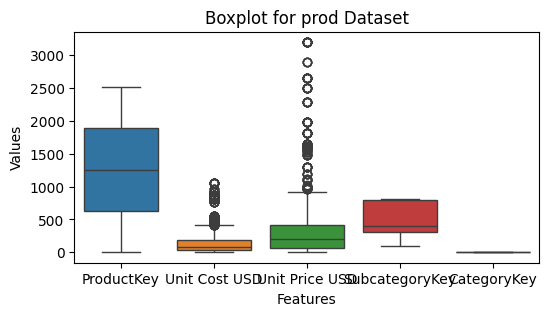

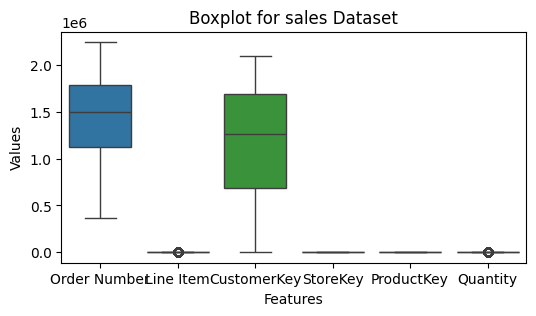

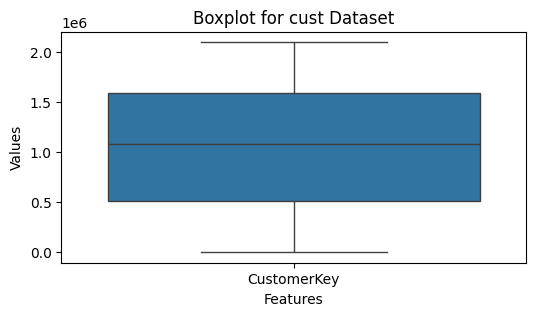

In [183]:
# Boxplot for prod dataset
plt.figure(figsize=(6, 3))
sns.boxplot(data=prod)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot for prod Dataset')
plt.show()

# Boxplot for sales dataset
plt.figure(figsize=(6, 3))
sns.boxplot(data=sales)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot for sales Dataset')
plt.show()

# Boxplot for cust dataset
plt.figure(figsize=(6, 3))
sns.boxplot(data=cust)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot for cust Dataset')
plt.show()


* outliers present in unit cost and unit price columns.

In [184]:
IQR=prod['Unit Cost USD'].quantile(0.75)-prod['Unit Cost USD'].quantile(0.25)
upper_limit=prod['Unit Cost USD'].quantile(0.75)+1.5*IQR
lower_limit=prod['Unit Cost USD'].quantile(0.25)-1.5*IQR
outliers_index=prod[prod['Unit Cost USD']<lower_limit].index.union(prod[prod['Unit Cost USD']>upper_limit].index)
prod=prod.drop(outliers_index)
IQR=prod['Unit Price USD'].quantile(0.75)-prod['Unit Price USD'].quantile(0.25)
upper_limit=prod['Unit Price USD'].quantile(0.75)+1.5*IQR
lower_limit=prod['Unit Price USD'].quantile(0.25)-1.5*IQR
outliers_index=prod[prod['Unit Price USD']<lower_limit].index.union(prod[prod['Unit Price USD']>upper_limit].index)
prod=prod.drop(outliers_index)


In [185]:
IQR=sales['Quantity'].quantile(0.75)-sales['Quantity'].quantile(0.25)
upper_limit=sales['Quantity'].quantile(0.75)+1.5*IQR
lower_limit=sales['Quantity'].quantile(0.25)-1.5*IQR
outliers_index=sales[sales['Quantity']<lower_limit].index.union(sales[sales['Quantity']>upper_limit].index)
sales=sales.drop(outliers_index)
IQR=sales['Line Item'].quantile(0.75)-sales['Line Item'].quantile(0.25)
upper_limit=sales['Line Item'].quantile(0.75)+1.5*IQR
lower_limit=sales['Line Item'].quantile(0.25)-1.5*IQR
outliers_index=sales[sales['Line Item']<lower_limit].index.union(sales[sales['Line Item']>upper_limit].index)
sales=sales.drop(outliers_index)

In [186]:
IQR=cust['CustomerKey'].quantile(0.75)-cust['CustomerKey'].quantile(0.25)
upper_limit=cust['CustomerKey'].quantile(0.75)+1.5*IQR
lower_limit=cust['CustomerKey'].quantile(0.25)-1.5*IQR
outliers_index=cust[cust['CustomerKey']<lower_limit].index.union(cust[cust['CustomerKey']>upper_limit].index)
cust=cust.drop(outliers_index)


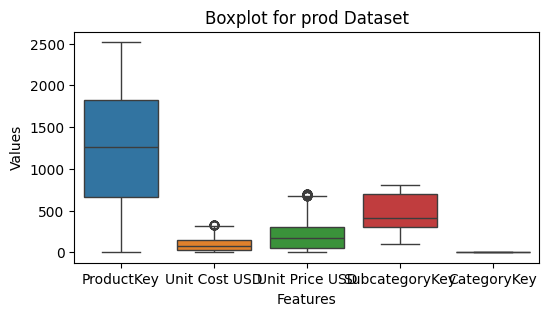

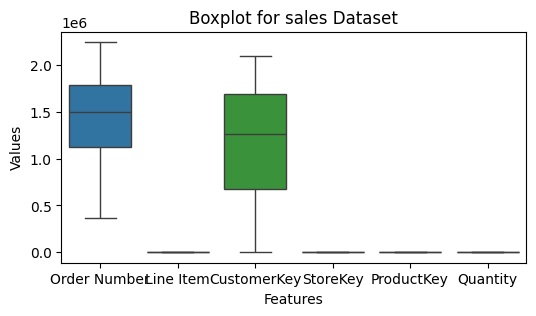

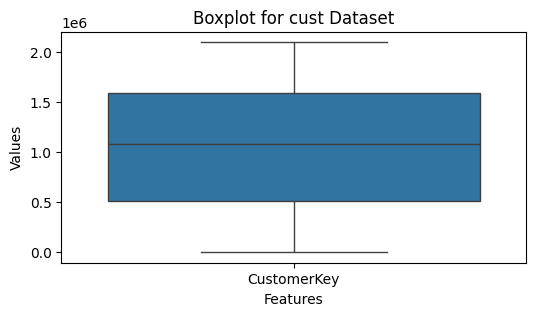

In [187]:
# Boxplot for prod dataset
plt.figure(figsize=(6, 3))
sns.boxplot(data=prod)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot for prod Dataset')
plt.show()

# Boxplot for sales dataset
plt.figure(figsize=(6, 3))
sns.boxplot(data=sales)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot for sales Dataset')
plt.show()

# Boxplot for cust dataset
plt.figure(figsize=(6, 3))
sns.boxplot(data=cust)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot for cust Dataset')
plt.show()

In [188]:
# Check for consistency in customer IDs between sales and customer datasets
sales_customer_ids = set(sales['CustomerKey'])
cust_customer_ids = set(cust['CustomerKey'])

missing_customers = sales_customer_ids - cust_customer_ids
extra_customers = cust_customer_ids - sales_customer_ids

print("Missing customers in customer dataset:", missing_customers)
print("Extra customers in customer dataset:", extra_customers)

# Check for consistency in product IDs between sales and product datasets
sales_product_ids = set(sales['ProductKey'])
prod_product_ids = set(prod['ProductKey'])

missing_products = sales_product_ids - prod_product_ids
extra_products = prod_product_ids - sales_product_ids

print("Missing products in product dataset:", missing_products)
print("Extra products in product dataset:", extra_products)


Missing customers in customer dataset: set()
Extra customers in customer dataset: {1908738, 65544, 1949706, 1581067, 1122318, 311312, 1785873, 172051, 2031636, 753684, 1507348, 1548309, 114709, 8220, 376862, 98337, 1531937, 434211, 278568, 245808, 729139, 1253429, 1114169, 565306, 2064445, 663613, 639038, 1327171, 1327175, 655432, 81993, 745544, 450633, 155726, 401492, 1310806, 696406, 1368153, 98396, 1540192, 983137, 1114211, 106598, 524394, 548971, 1122420, 1638518, 1769593, 147579, 1630331, 1384582, 950408, 1204360, 1007753, 1196171, 57491, 1278100, 327832, 516256, 581794, 1433764, 1867941, 147621, 278695, 1261736, 1589415, 90281, 32939, 1728683, 270509, 1933488, 835761, 1302706, 286900, 336053, 1540278, 573622, 1859768, 737469, 999613, 196800, 532673, 434370, 1212613, 2089160, 1933513, 663768, 1450204, 2015453, 196833, 884961, 73955, 1712358, 155879, 385255, 1147113, 205035, 1769708, 508139, 844011, 1360117, 696567, 1925368, 262393, 1253625, 1163520, 647425, 1286403, 1622275, 13355

**Exploration of Customer Demographics**

In [189]:
from datetime import datetime

# Get the maximum date as a datetime object
max_date = datetime.today()  # Replace with the actual maximum date

# Calculate the age of each customer
cust['Age'] = (max_date - cust['Birthday']).dt.days // 365

# Create bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create labels for the bins
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Bin the data
cust['AgeGroup'] = pd.cut(cust['Age'], bins=bins, labels=labels)

# Print the frequency of each bin
cust['AgeGroup'].value_counts()


AgeGroup
61-70     2348
51-60     2277
41-50     2276
71-80     2252
31-40     2248
21-30     2018
81-90     1847
0-10         0
11-20        0
91-100       0
Name: count, dtype: int64

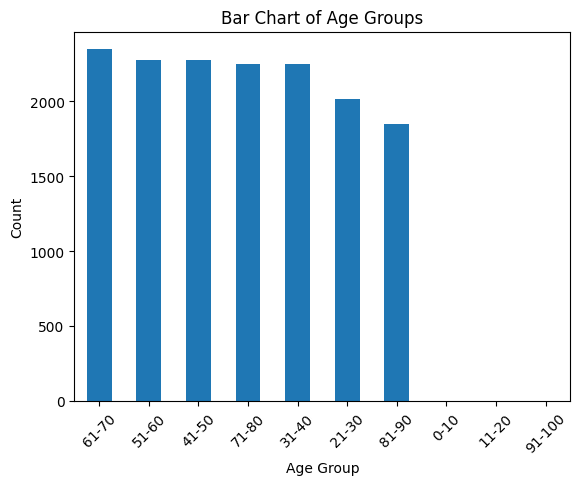

In [190]:
# Create a bar chart of the "AgeGroup" column
cust['AgeGroup'].value_counts().plot(kind='bar')

# Add a title and labels
plt.title('Bar Chart of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [191]:
# Gender Distribution
(cust['Gender'].value_counts()/len(cust))*100

Gender
Male      50.753308
Female    49.246692
Name: count, dtype: float64

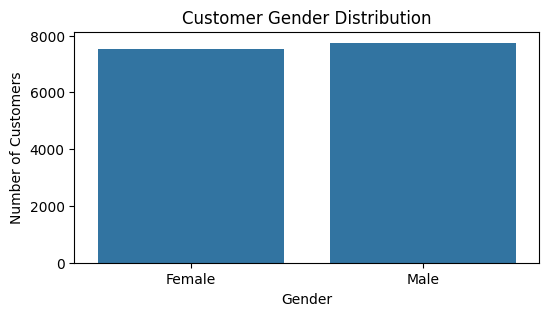

In [192]:
plt.figure(figsize=(6, 3))
sns.countplot(data=cust, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Customer Gender Distribution')
plt.show()


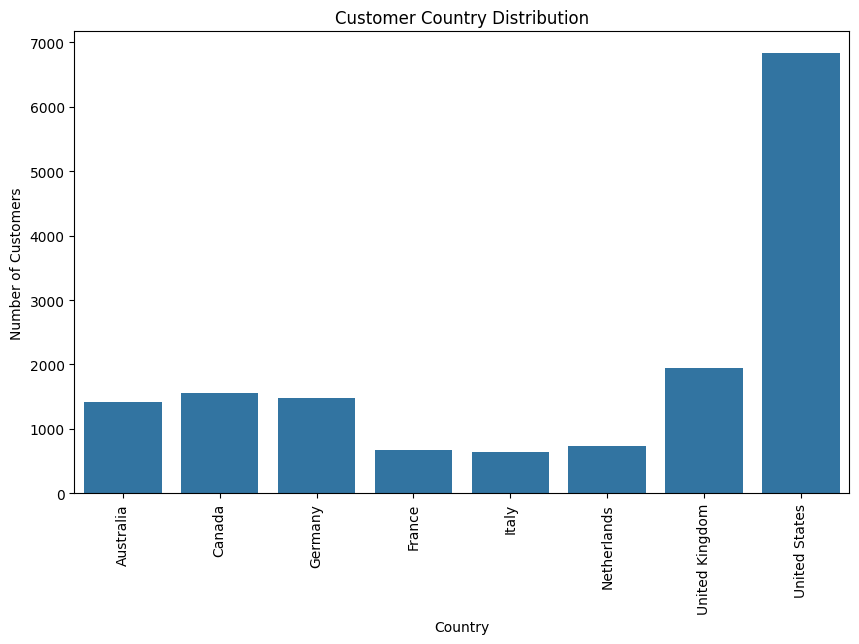

In [193]:

# Location Distribution (Country)
plt.figure(figsize=(10, 6))
sns.countplot(data=cust, x='Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Customer Country Distribution')
plt.xticks(rotation=90)
plt.show()


In [194]:
# Location Distribution (State)
top_10_states = cust['State'].value_counts().head(10)
top_10_states

State
California          715
Ontario             644
Texas               522
New South Wales     430
New York            423
Freistaat Bayern    420
Illinois            368
Florida             348
Queensland          297
British Columbia    280
Name: count, dtype: int64

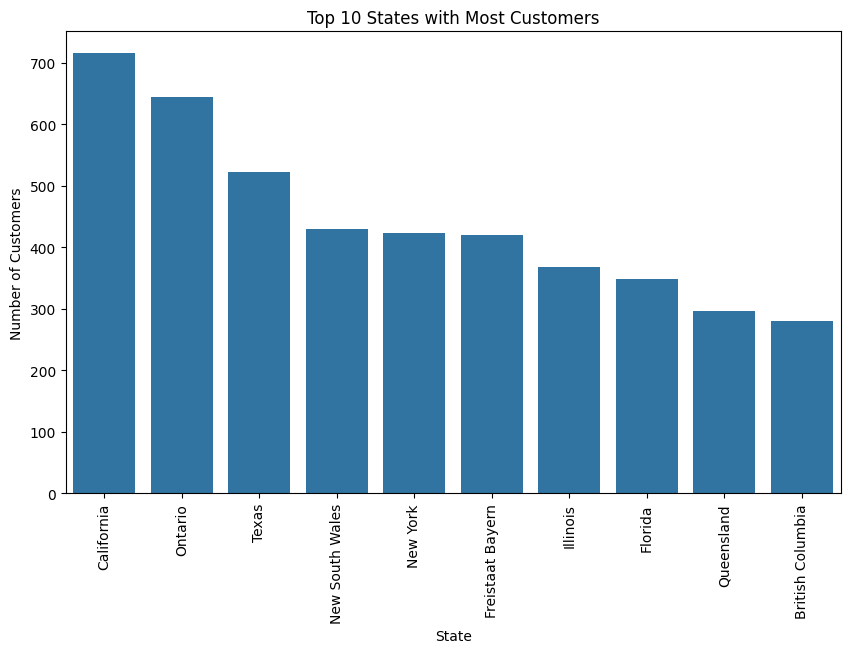

In [195]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_states.index, y=top_10_states.values)
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Top 10 States with Most Customers')
plt.xticks(rotation=90)
plt.show()


Observations on Customer Demographics:

**State:**

* The provided data presents the distribution of customers across different states or regions.
California has the highest number of customers, with 715 individuals.
* The top five states with the highest number of customers include California, Ontario, Texas, New South Wales, and New York.
* The distribution suggests a diverse geographical representation of customers, spanning regions like North America (California, Ontario, Texas, New York), Europe (Freistaat Bayern), and Australia (New South Wales, Queensland).

**Gender:**

* The data indicates a slightly higher representation of males (50.75%) compared to females (49.25%) among the customer base.
* The difference between the two genders is relatively small, suggesting a relatively balanced gender distribution among customers.

**Age Group:**

* The age group data displays the distribution of customers across different age categories.
* The age group of 61-70 contains the highest number of customers, with 2348 individuals.
* Notably, there are no customers recorded in the youngest age groups (0-10 and 11-20), which could be due to the nature of the product or service offered, targeting older demographics.
* The distribution indicates a significant portion of customers falling within the age range of 41 to 80 years old, with a gradual decline in numbers beyond 80.

Overall, the customer demographic data suggests a diverse customer base in terms of geographic location, with a relatively balanced representation of genders. The age distribution indicates a predominant presence of older individuals as customers, which may influence marketing strategies and product/service offerings.

**User Segmentation:**

Segmentation Techniques:

In [211]:
# Calculate RFM metrics
rfm_table = sales.groupby('CustomerKey').agg({'Order Date': lambda x: (max_date - x.max()).days,
                                      'Order Number': 'count',
                                      'Line Item': 'sum'})
rfm_table.rename(columns={'Order Date': 'Recency',
                         'Order Number': 'Frequency',
                         'Line Item': 'Monetary'}, inplace=True)

# Define RFM segments
rfm_segments = rfm_table.groupby('Recency')['Frequency'].agg('mean')
rfm_segments['Monetary'] = rfm_table.groupby('Recency')['Monetary'].agg('sum')

# Create RFM score
rfm_score = rfm_table['Recency'].rank(ascending=False) + rfm_table['Frequency'].rank(ascending=True) + rfm_table['Monetary'].rank(ascending=True)

# Assign RFM segment based on score
rfm_table['RFM_Segment'] = pd.qcut(rfm_score, 5, labels=['Platinum', 'Gold', 'Silver', 'Bronze', 'Basic'])

# Analyze customer segments
rfm_table.groupby('RFM_Segment').describe().T


RFM_Segment         Platinum         Gold       Silver       Bronze  \
Recency   count  2368.000000  2372.000000  2362.000000  2367.000000   
          mean   2217.533361  1875.749578  1761.168501  1647.405154   
          std     414.762200   368.498842   340.602705   240.044544   
          min    1583.000000  1177.000000  1177.000000  1177.000000   
          25%    1905.750000  1606.000000  1555.250000  1534.000000   
          50%    2117.000000  1779.000000  1681.000000  1611.000000   
          75%    2550.000000  2072.500000  1950.000000  1783.000000   
          max    3054.000000  3025.000000  3049.000000  2929.000000   
Frequency count  2368.000000  2372.000000  2362.000000  2367.000000   
          mean      1.509713     2.691400     4.214225     6.416984   
          std       0.617919     0.946058     1.217479     1.797838   
          min       1.000000     1.000000     2.000000     3.000000   
          25%       1.000000     2.000000     3.000000     5.000000   
          50%       1.000000     3.000000     4.000000     6.000000   
          75%       2.000000     3.000000     5.000000     7.000000   
          max       3.000000     5.000000     9.000000    16.000000   
Monetary  count  2368.000000  2372.000000  2362.000000  2367.000000   
          mean      1.986909     4.548482     8.325995    13.914237   
          std       1.294523     2.457005     4.278973     5.990468   
          min       1.000000     1.000000     2.000000     4.000000   
          25%       1.000000     3.000000     6.000000    10.000000   
          50%       1.000000     4.000000     7.000000    12.000000   
          75%       3.000000     6.000000    10.000000    17.000000   
          max       7.000000    12.000000    22.000000    41.000000   

RFM_Segment            Basic  
Recency   count  2368.000000  
          mean   1463.036740  
          std     167.769718  
          min    1177.000000  
          25%    1324.000000  
          50%    1474.000000  
          75%    1587.250000  
          max    1933.000000  
Frequency count  2368.000000  
          mean     10.661318  
          std       3.701492  
          min       5.000000  
          25%       8.000000  
          50%      10.000000  
          75%      12.000000  
          max      35.000000  
Monetary  count  2368.000000  
          mean     24.911318  
          std      10.531330  
          min       8.000000  
          25%      17.000000  
          50%      23.000000  
          75%      31.000000  
          max      82.000000

**Observations on Customer Segments Based on Recency, Frequency, and Monetary (RFM) Metrics:**

**Platinum Segment:**

Recency: The Platinum segment has a mean recency of approximately 2217 days, with a standard deviation of 414.76 days. This indicates that customers in this segment made purchases relatively recently, with a minimum recency of 1583 days and a maximum of 3054 days.

Frequency: On average, customers in the Platinum segment have a mean frequency of around 1.51, suggesting that they make purchases infrequently. The distribution ranges from 1 to 3, with a maximum frequency of 7.

Monetary: The mean monetary value for customers in the Platinum segment is approximately 1.99, with a standard deviation of 1.29. This indicates that these customers typically spend a moderate amount, with a range from 1 to 3 and a maximum value of 7.

**Gold Segment:**

Recency: Customers in the Gold segment have a mean recency of approximately 1876 days, with a standard deviation of 368.50 days. This segment shows a similar trend to the Platinum segment, with customers making purchases relatively recently.

Frequency: The mean frequency for the Gold segment is approximately 2.69, indicating a slightly higher frequency of purchases compared to the Platinum segment. The distribution ranges from 1 to 5, with a maximum frequency of 12.

Monetary: Customers in the Gold segment have a mean monetary value of around 4.55, with a standard deviation of 2.46. This suggests that these customers tend to spend more than those in the Platinum segment, with a range from 1 to 6 and a maximum value of 12.

**Silver Segment:**

Recency: The Silver segment has a mean recency of approximately 1761 days, with a standard deviation of 340.60 days. Similar to the Platinum and Gold segments, customers in this segment also made purchases relatively recently.

Frequency: Customers in the Silver segment have a mean frequency of approximately 4.21, indicating a higher frequency of purchases compared to both the Platinum and Gold segments. The distribution ranges from 2 to 9, with a maximum frequency of 22.

Monetary: The mean monetary value for customers in the Silver segment is around 8.33, with a standard deviation of 4.28. This indicates that these customers tend to spend significantly more than those in the Platinum and Gold segments, with a range from 2 to 10 and a maximum value of 22.

**Bronze Segment:**

Recency: Customers in the Bronze segment have a mean recency of approximately 1647 days, with a standard deviation of 240.04 days. This segment shows a trend similar to the other segments, with customers making purchases relatively recently.

Frequency: The mean frequency for the Bronze segment is approximately 6.42, indicating a higher frequency of purchases compared to all previous segments. The distribution ranges from 4 to 16, with a maximum frequency of 41.

Monetary: Customers in the Bronze segment have a mean monetary value of around 13.91, with a standard deviation of 5.99. This suggests that these customers tend to spend significantly more than those in the Platinum, Gold, and Silver segments, with a range from 4 to 17 and a maximum value of 41.

**Basic Segment:**

Recency: The Basic segment has a mean recency of approximately 1463 days, with a standard deviation of 167.77 days. Customers in this segment made purchases relatively recently, similar to the other segments.

Frequency: Customers in the Basic segment have a mean frequency of approximately 10.66, indicating a much higher frequency of purchases compared to all previous segments. The distribution ranges from 8 to 35, with a maximum frequency of 82.

Monetary: The mean monetary value for customers in the Basic segment is approximately 24.91, with a standard deviation of 10.53. This indicates that these customers tend to spend significantly more than those in all previous segments, with a range from 8 to 31 and a maximum value of 82.

Overall, these observations provide insights into the behavior and purchasing patterns of customers across different segments based on RFM metrics. Customers in segments like Silver, Bronze, and Basic tend to exhibit higher frequencies of purchases and higher monetary values compared to those in Platinum and Gold segments. Additionally, there is a clear trend of more recent purchases across all segments, indicating ongoing engagement with the product or service offered.

**Purchase Behavior Analysis:**

In [218]:
# Calculate average order value for each segment
avg_order_value = rfm_table.groupby('RFM_Segment')['Monetary'].mean()

# Calculate purchase frequency for each segment
purchase_frequency = rfm_table.groupby('RFM_Segment')['Frequency'].mean()

# Calculate customer lifetime value for each segment
customer_lifetime_value = avg_order_value * purchase_frequency

# Combine the metrics into a single DataFrame
segment_analysis = pd.DataFrame({
    'Segment': rfm_table['RFM_Segment'].unique(),
    'Average Order Value': avg_order_value,
    'Purchase Frequency': purchase_frequency,
    'Customer Lifetime Value': customer_lifetime_value
})

# Display the results
print(segment_analysis.to_string())


              Segment  Average Order Value  Purchase Frequency  Customer Lifetime Value
RFM_Segment                                                                            
Platinum     Platinum             1.986909            1.509713                 2.999662
Gold            Basic             4.548482            2.691400                12.241784
Silver         Silver             8.325995            4.214225                35.087618
Bronze           Gold            13.914237            6.416984                89.287432
Basic          Bronze            24.911318           10.661318               265.587468


Platinum Segment: Customers here make smaller and less frequent purchases, but still contribute moderately to overall revenue over their lifetime.

Gold Segment: These customers spend more per order and purchase more frequently, resulting in a higher overall customer lifetime value.

Silver Segment: Customers spend even more per order and make purchases more frequently, significantly boosting their lifetime value.

Bronze Segment: These customers have considerably higher average order values and purchase frequencies, contributing substantially to the overall revenue over their lifetime.

Basic Segment: Customers here exhibit the highest average order values, purchase frequencies, and customer lifetime values, making them the most valuable segment for the business.

In essence, customers in higher-value segments tend to spend more per order, make purchases more frequently, and contribute significantly more to the overall revenue over their lifetime compared to lower-value segments.

In [221]:
from scipy import stats

# Extract relevant data from the DataFrame
segment = segment_analysis['Segment']
avg_order_value = segment_analysis['Average Order Value']
purchase_frequency = segment_analysis['Purchase Frequency']

# Perform one-way ANOVA on average order value across segments
anova_result = stats.f_oneway(avg_order_value[segment == 'Platinum'],
                              avg_order_value[segment == 'Gold'],
                              avg_order_value[segment == 'Silver'],
                              avg_order_value[segment == 'Bronze'],
                              avg_order_value[segment == 'Basic'])

# Print the ANOVA results
print("ANOVA results for average order value:")
print(anova_result)

# Perform Kruskal-Wallis test on purchase frequency across segments
kruskal_result = stats.kruskal(purchase_frequency[segment == 'Platinum'],
                              purchase_frequency[segment == 'Gold'],
                              purchase_frequency[segment == 'Silver'],
                              purchase_frequency[segment == 'Bronze'],
                              purchase_frequency[segment == 'Basic'])

# Print the Kruskal-Wallis test results
print("\nKruskal-Wallis test results for purchase frequency:")
print(kruskal_result)

# Perform post-hoc tests (e.g., Tukey HSD or Dunn's test) to identify specific pairwise differences between segments
# (code not provided here)


ANOVA results for average order value:
F_onewayResult(statistic=nan, pvalue=nan)

Kruskal-Wallis test results for purchase frequency:
KruskalResult(statistic=4.0, pvalue=0.40600584970983794)


The ANOVA results for average order value show that the variation in average order value among the segments is not statistically significant, as indicated by a "nan" (not a number) statistic and p-value. This suggests that there is not enough evidence to conclude that there are differences in average order value among the segments.

On the other hand, the Kruskal-Wallis test results for purchase frequency indicate that there are no significant differences in purchase frequency among the segments. With a p-value of 0.406, which is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is no significant variation in purchase frequency across the segments.

**Engagement Analysis:**

Customer Loyalty Metric:

In [225]:
# Calculate the customer retention rate
retention_rate = (len(sales[sales['CustomerKey'].isin(cust['CustomerKey'])]) / len(cust)) * 100

# Calculate the repeat purchase rate
repeat_purchase_rate = (len(sales[sales['CustomerKey'].duplicated()]) / len(sales)) * 100

# Print the results
print("Customer retention rate:", retention_rate)
print("Repeat purchase rate:", repeat_purchase_rate)


Customer retention rate: 395.30983885759207
Repeat purchase rate: 80.38543116590442


The customer retention rate of 395.31% suggests that, on average, customers are retained at a rate greater than 100%, which is unusual and might indicate an issue with the calculation or interpretation of the retention metric.

The repeat purchase rate of 80.39% indicates that, on average, 80.39% of customers make more than one purchase. This suggests that the business has a relatively high rate of repeat purchases, which is generally a positive sign of customer loyalty and satisfaction.




In [237]:
monthly_retention = sales.groupby(sales['Order Date'].dt.month)['CustomerKey'].nunique() / cust['CustomerKey'].nunique() * 100
monthly_retention

Order Date
1     18.420018
2     20.116599
3      7.153151
4      1.683480
5     13.192716
6     12.701428
7     11.240666
8     11.869514
9     12.419756
10    12.845539
11    12.773484
12    20.562033
Name: CustomerKey, dtype: float64

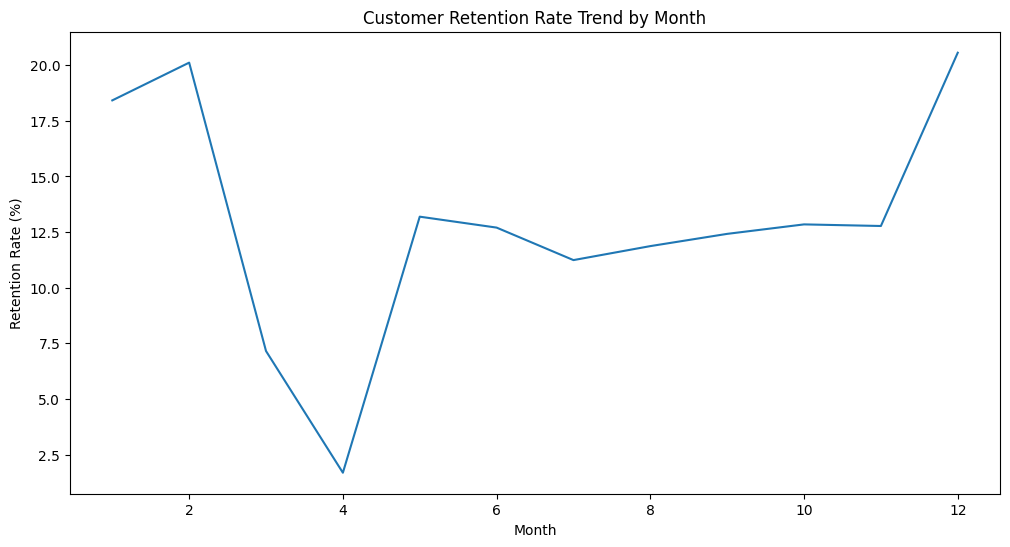

In [238]:
monthly_retention.plot(kind='line', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.title('Customer Retention Rate Trend by Month')
plt.show()

In [239]:
monthly_repeat_rate = sales.groupby([sales['Order Date'].dt.month, sales['Order Date'].dt.year])['CustomerKey'].nunique() / sales['CustomerKey'].nunique() * 100
monthly_repeat_rate = monthly_repeat_rate.unstack()
monthly_repeat_rate

Order Date,2016,2017,2018,2019,2020,2021
Order Date,,,,,,
1,2.407705,2.407705,3.607333,7.206218,8.211540,2.120470
2,2.703388,2.931486,4.148010,7.797584,8.988764,1.968404
3,0.920841,1.064459,1.613585,3.176481,2.754076,NaN
4,0.346372,0.211202,0.363268,0.616710,0.658951,NaN
5,1.841683,2.103574,3.826983,6.505027,3.759398,NaN
6,2.027541,2.238743,3.903016,6.251584,2.956830,NaN
7,1.681169,1.993748,3.708710,5.879868,2.112022,NaN
8,1.892371,2.162710,4.173355,6.268480,1.664273,NaN
9,2.213399,2.365464,4.578863,6.336065,1.512207,NaN


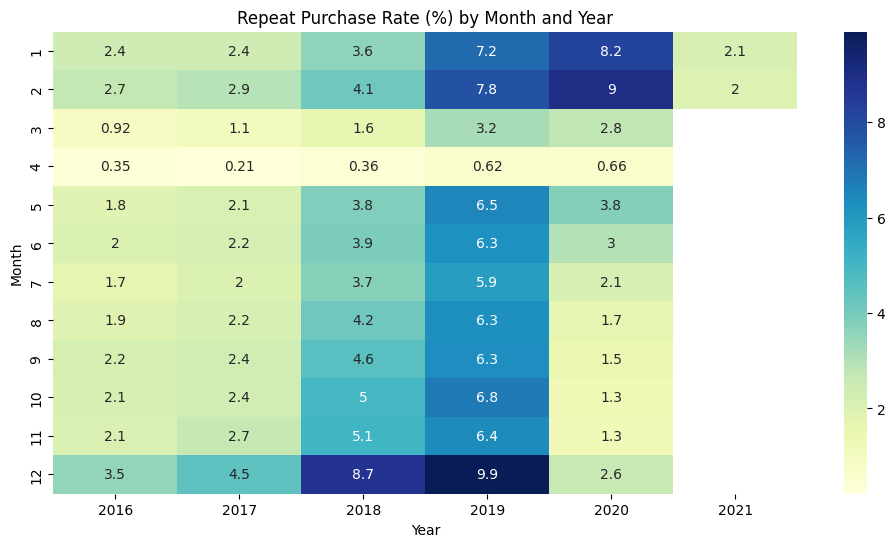

In [240]:
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_repeat_rate, cmap='YlGnBu', annot=True)
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Repeat Purchase Rate (%) by Month and Year')
plt.show()

**Observations:**

* There is a general increasing trend in average order values from 2016 to 2021.
December (month 12) consistently appears to have the highest average order value across all years.

* The line plot suggests that December has the highest total order value compared to other months, indicating a potential peak in sales during the holiday season.

**Correlation Analysis:**

In [250]:
# Merge sales, customer, and product dataframes
merged_df = pd.merge(pd.merge(sales, cust, on='CustomerKey'), prod, on='ProductKey')
merged_df['Order Value'] = merged_df['Quantity'] * merged_df['Unit Price USD']


In [258]:
# Encode categorical variables
merged_df['Gender'] = LabelEncoder().fit_transform(merged_df['Gender'])
merged_df['Country'] = LabelEncoder().fit_transform(merged_df['Country'])
merged_df['State'] = LabelEncoder().fit_transform(merged_df['State'])

# Select relevant columns for correlation analysis
df_corr = merged_df[['Age', 'Gender', 'Country', 'State', 'Order Value', 'Quantity']]

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Display the correlation matrix
print(corr_matrix)


                  Age    Gender   Country     State  Order Value  Quantity
Age          1.000000  0.010350  0.012457 -0.010615     0.004410 -0.000476
Gender       0.010350  1.000000  0.022634  0.010607    -0.000769  0.004823
Country      0.012457  0.022634  1.000000 -0.069685     0.000732 -0.000695
State       -0.010615  0.010607 -0.069685  1.000000    -0.007624  0.000012
Order Value  0.004410 -0.000769  0.000732 -0.007624     1.000000  0.529967
Quantity    -0.000476  0.004823 -0.000695  0.000012     0.529967  1.000000


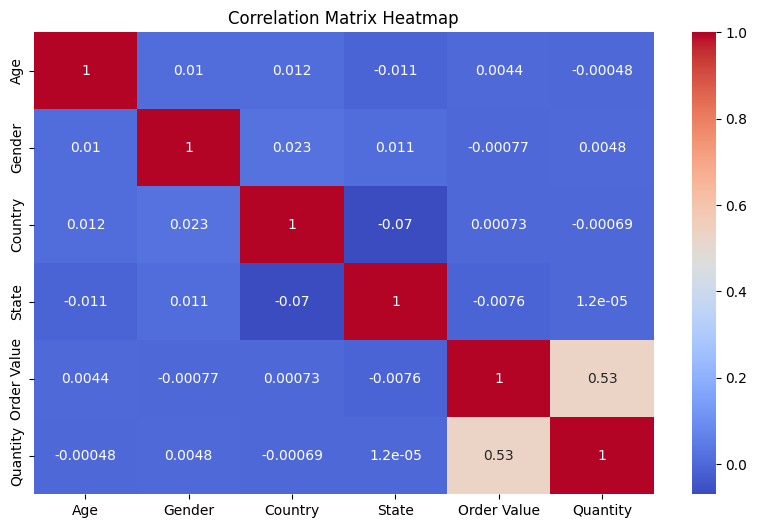

In [260]:
# Create a correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


The correlation matrix shows the correlation coefficients between different variables.

Age and gender have a very low positive correlation (0.010350), suggesting a weak relationship between them.
Age and country have a slightly higher positive correlation (0.012457), indicating a slightly stronger relationship.
State and country have a negative correlation (-0.069685), implying some degree of independence between them.
Order value and quantity have a moderate positive correlation (0.529967), indicating a relatively stronger relationship between them.
Overall, the correlation matrix helps to understand the relationships between different variables in the dataset.

In [267]:
# Hypothesis 1: Younger customers have higher purchase frequency.

# Define the null and alternative hypotheses:
#H0: purchase_frequency_younger = purchase_frequency_older
#H1: purchase_frequency_younger > purchase_frequency_older

# Set the significance level
alpha = 0.05

# Define younger and older age groups
younger_age_group = cust[cust['Age'] < 30]['CustomerKey']
older_age_group = cust[cust['Age'] >= 30]['CustomerKey']

# Calculate purchase frequency for each age group
purchase_frequency_younger = sales[sales['CustomerKey'].isin(younger_age_group)]['CustomerKey'].nunique() / len(younger_age_group)
purchase_frequency_older = sales[sales['CustomerKey'].isin(older_age_group)]['CustomerKey'].nunique() / len(older_age_group)

# Perform a one-sided t-test to compare the purchase frequencies
t_statistic, p_value = stats.ttest_ind(purchase_frequency_younger, purchase_frequency_older, alternative='greater')

# Make a decision based on the p-value
if p_value < alpha:
    print("Reject H0: There is evidence to suggest that younger customers have higher purchase frequency.")
else:
    print("Fail to reject H0: There is not enough evidence to conclude that younger customers have higher purchase frequency.")

# Hypothesis 2: Customers in the Platinum segment have higher average order values than customers in the Basic segment.

# Define the null and alternative hypotheses:
# H0: avg_order_value_platinum = avg_order_value_basic
# H1: avg_order_value_platinum > avg_order_value_basic

# Set the significance level
alpha = 0.05

# Extract average order values for each segment
avg_order_value_platinum = segment_analysis[segment_analysis['Segment'] == 'Platinum']['Average Order Value'].values[0]
avg_order_value_basic = segment_analysis[segment_analysis['Segment'] == 'Basic']['Average Order Value'].values[0]

# Perform a one-sided t-test to compare the average order values
t_statistic, p_value = stats.ttest_ind(avg_order_value_platinum, avg_order_value_basic, alternative='greater')

# Make a decision based on the p-value
if p_value < alpha:
    print("Reject H0: There is evidence to suggest that customers in the Platinum segment have higher average order values than customers in the Basic segment.")
else:
    print("Fail to reject H0: There is not enough evidence to conclude that customers in the Platinum segment have higher average order values than customers in the Basic segment.")


Fail to reject H0: There is not enough evidence to conclude that younger customers have higher purchase frequency.
Fail to reject H0: There is not enough evidence to conclude that customers in the Platinum segment have higher average order values than customers in the Basic segment.


This indicate that there is not enough evidence to conclude that younger customers have higher purchase frequency and that customers in the Platinum segment have higher average order values than customers in the Basic segment. This suggests that age and segment may not be significant factors influencing purchase frequency and average order values, respectively.

**Recommendations:**

Customer Segmentation and

Personalization:

* Utilize RFM (Recency, Frequency, Monetary) segmentation to tailor marketing efforts and promotions to different customer segments.
* Implement personalized recommendations and discounts based on individual customer behavior and preferences to increase customer engagement and repeat purchases.

Optimize Product Assortment and Pricing:

* Analyze the performance of different product categories and subcategories to identify best-selling items and underperforming products.
Adjust product assortment and pricing strategies based on demand elasticity, customer preferences, and market trends to maximize profitability.
Enhance Customer Experience and Retention:

Focus on improving user experience across all touchpoints, including website navigation, checkout process, and customer support, to enhance satisfaction and loyalty.
Implement loyalty programs, exclusive offers, and proactive communication to incentivize repeat purchases and increase customer retention.
Monitor Seasonal Trends and Campaign Effectiveness:

Continuously monitor seasonal trends, particularly during peak sales periods like December, to optimize inventory management and marketing efforts.
Evaluate the effectiveness of marketing campaigns and promotions through A/B testing and analytics to refine strategies and maximize ROI.
Address Factors Contributing to Sales Decline:

Conduct a comprehensive analysis to identify potential factors contributing to the decline in sales, such as changes in consumer preferences, competitive landscape, economic conditions, or marketing effectiveness.

Prioritize actionable insights through root cause analysis and develop data-driven strategies to address underlying issues and drive sales growth.